# Frame Report
## Introduction
In this tutorial we cover how to inspect a frame report using BlueBrain SNAP and access its properties.

We start by importing the `bluepysnap` package:

In [1]:
import bluepysnap

## Loading
In order to load the simulation data, we need the path to the file.

In [2]:
simulation_path = "/gpfs/bbp.cscs.ch/project/proj42/circuits/CA1.O1/mooc-circuit/simulation_config_bluepy_examples.json"
simulation = bluepysnap.Simulation(simulation_path)

There are two different possible report types `'soma_report'` and `'compartment_report'`. In this tutorial, we only work with `'soma_report'` but they work exactly in the same way. Available frame reports can be shown with

In [3]:
simulation.reports

{'soma_report': <bluepysnap.frame_report.SomaReport at 0x7f58ea6d8550>}

Accessing the reports is straightforward

In [4]:
soma_report = simulation.reports['soma_report']

## Timing

As with the `Simulation` instance, it's easy to access report start and end time, as well as the time step (dt) and time_units

In [5]:
print(
    soma_report.time_start, 
    soma_report.time_stop, 
    soma_report.dt,
    soma_report.time_units
)  # Gives a warning in case the dt differs from simulation.dt

dt from the report differs from the global simulation dt.


0 1000.0 0.1 ms


## Populations
If we are interested in the populations in frame report, they can be shown with

In [6]:
soma_report.population_names

['hippocampus_neurons']

In [7]:
soma_pop = soma_report['hippocampus_neurons']
print(type(soma_pop))

<class 'bluepysnap.frame_report.PopulationSomaReport'>


Accessing the actual NodePopulation from the report can be done with

In [8]:
node_population = soma_pop.nodes
print(f'{node_population.name}: {type(node_population)}')

hippocampus_neurons: <class 'bluepysnap.nodes.NodePopulation'>


## Node IDs
Accessing the node_ids in the report and getting their info is the same as in the SpikeReport

In [9]:
ids = soma_pop.node_ids
node_population.get(ids, properties=['layer','synapse_class','x','y','z']).head()

,layer,synapse_class,x,y,z
0,SLM,INH,409.446689,525.218483,1074.146619
1,SLM,INH,692.961402,511.187277,573.179832
2,SLM,INH,624.142630,520.641475,976.924721
3,SR,INH,430.543380,411.999965,1180.185218
4,SR,INH,427.936977,302.239247,1013.453517


## Filtering
We can filter the report the same way as in SpikeReport. Just as in SpikeReport, the index are different moments of time. Please note that this time, as there is more data in the output, the columns represent the population names and the ids.

In [10]:
filtered = soma_report.filter(group={'layer':'SP'}, t_start=1, t_stop=100)
filtered.report.head()

hippocampus_neurons                                              \
                  36         37         38         39         40      
1.0          -64.495819 -63.987568 -62.878498 -63.299671 -65.634201   
1.1          -64.667297 -64.153236 -63.007919 -63.403816 -65.700539   
1.2          -64.836189 -64.316284 -63.137890 -63.507111 -65.766029   
1.3          -65.002808 -64.477020 -63.268269 -63.609692 -65.830833   
1.4          -65.167358 -64.635651 -63.398903 -63.711647 -65.895073   

                                                            ...             \
         41         42         43         44         45     ...      18028   
1.0 -69.895012 -60.940189 -64.212494 -65.128319 -65.810913  ... -62.824352   
1.1 -69.863594 -61.141182 -64.390297 -65.280983 -65.886642  ... -63.159550   
1.2 -69.833801 -61.339825 -64.564308 -65.428932 -65.961830  ... -63.481346   
1.3 -69.805328 -61.536880 -64.734985 -65.572899 -66.036568  ... -63.791656   
1.4 -69.777985 -61.732819 -64.902641 -65.713432 -66.110916  ... -64.091980   

                                                                       \
         18029      18030      18031      18032      18033      18034   
1.0 -69.909012 -58.932209 -69.869728 -63.633045 -62.883789 -67.959328   
1.1 -70.017754 -59.412067 -69.980461 -63.979340 -63.340405 -68.112579   
1.2 -70.124634 -59.878464 -70.089333 -64.307793 -63.783619 -68.260345   
1.3 -70.229721 -60.331379 -70.196411 -64.620468 -64.214165 -68.403145   
1.4 -70.333076 -60.771034 -70.301758 -64.919052 -64.632706 -68.541420   

                                      
         18035      18036      18037  
1.0 -67.936882 -63.578728 -65.507950  
1.1 -68.085899 -63.905514 -65.812584  
1.2 -68.229614 -64.216225 -66.099930  
1.3 -68.368538 -64.512779 -66.372002  
1.4 -68.503098 -64.796761 -66.630463  

[5 rows x 18002 columns]

## Plotting
Frame reports can only do trace plots. Again, we can only plot filtered data

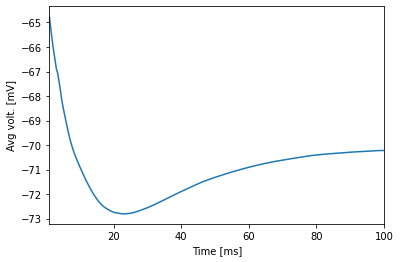

In [11]:
filtered.trace();

And of course, calling `filter` without arguments provides all available data

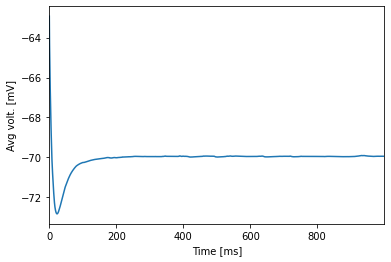

In [12]:
soma_report.filter().trace();

## Reading the log
Not applicable to `FrameReport`s

## Conclusion
We introduced how frame reports can be accessed and plotted with `bluepysnap`. This concludes the basic usage tutorials.